In [ ]:
!apt-get update && apt-get install swig cmake
!pip install box2d-py
!pip install "stable-baselines3[extra]>=2.0.0a4"
!pip install sb3-contrib

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 2s (152 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (4.0.1-5b

In [ ]:
import gymnasium as gym
import numpy as np
from stable_baselines3 import DQN
from sb3_contrib.qrdqn import QRDQN
from stable_baselines3.common.evaluation import evaluate_policy
import os
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt
from stable_baselines3.common.results_plotter import plot_results, ts2xy
from stable_baselines3.common.monitor import load_results
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from IPython import display as ipythondisplay
import base64
from pathlib import Path

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(
/usr/local/lib/python3.10/dist-packages/jaxlib/xla_client.py:225: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  float8_e4m3b11fnuz = ml_dtypes.float8_e4m3b11


In [ ]:
#  "MlpPolicy"  "CnnPolicy"

# enviroment  = 'MsPacman-v0'   "LunarLander-v2"   "ALE/MsPacman-v5"   "CartPole-v0"
list_OF_quantiles = [35 , 40 , 45 , 50 , 55 , 60 ]
ENVIROMENT = "CartPole-v0"
POLICY = "MlpPolicy"
log_folders = []
for i , quantile in zip(range(1,len(list_OF_quantiles)+1) , list_OF_quantiles):

      # Train the agent
      log_dir = f"temp{i}"
      os.makedirs(log_dir, exist_ok=True)
      log_folders.append(log_dir)

      env = gym.make(ENVIROMENT)
      env = Monitor(env, log_dir)

      policy_kwargs = dict(n_quantiles = quantile)

      model = QRDQN(POLICY, env, policy_kwargs=policy_kwargs, verbose=1)
      model.learn(total_timesteps=int(350000), log_interval=4)

      # Save the agent
      model.save(f"QR_dqn_{ENVIROMENT}")
      del model

Using cuda device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29       |
|    ep_rew_mean      | 29       |
|    exploration_rate | 0.934    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 10977    |
|    time_elapsed     | 0        |
|    total_timesteps  | 116      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.1     |
|    ep_rew_mean      | 30.1     |
|    exploration_rate | 0.864    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 9609     |
|    time_elapsed     | 0        |
|    total_timesteps  | 241      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.1     |
|    ep_rew_mean      | 29.1     |
|    exploration_rate | 0.803    |
| 

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(


Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 5e-05    |
|    loss             | 11.1     |
|    n_updates        | 21165    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.6     |
|    ep_rew_mean      | 99.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5692     |
|    fps              | 968      |
|    time_elapsed     | 139      |
|    total_timesteps  | 135138   |
| train/              |          |
|    learning_rate    | 5e-05    |
|    loss             | 7.64     |
|    n_updates        | 21284    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.3     |
|    ep_rew_mean      | 98.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5696     |
|   

In [ ]:
log_folders

['temp1', 'temp2', 'temp3', 'temp4', 'temp5', 'temp6']

In [ ]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folders, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """


    fig = plt.figure(title , figsize=(7,7))

    for i in range(len(list_OF_quantiles)):
          log_folder = log_folders[i]
          x , y = ts2xy(load_results(log_folder), 'timesteps')
          y = moving_average(y, window=50)
          # Truncate x
          x = x[len(x) - len(y):]

          plt.plot(x, y , label = f"{list_OF_quantiles[i]} quantiles")
          plt.xlabel('Number of Timesteps')
          plt.ylabel('Rewards')
          plt.title(title + " Smoothed")
    plt.legend()
    plt.show()

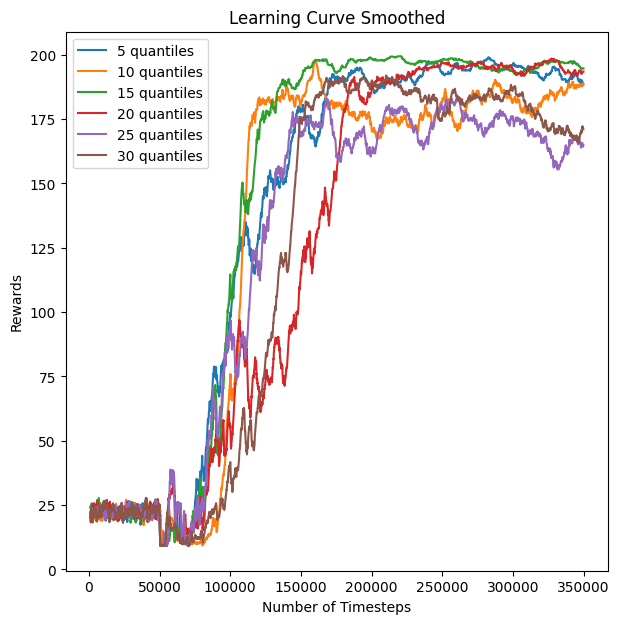

In [ ]:
plot_results(log_folders)

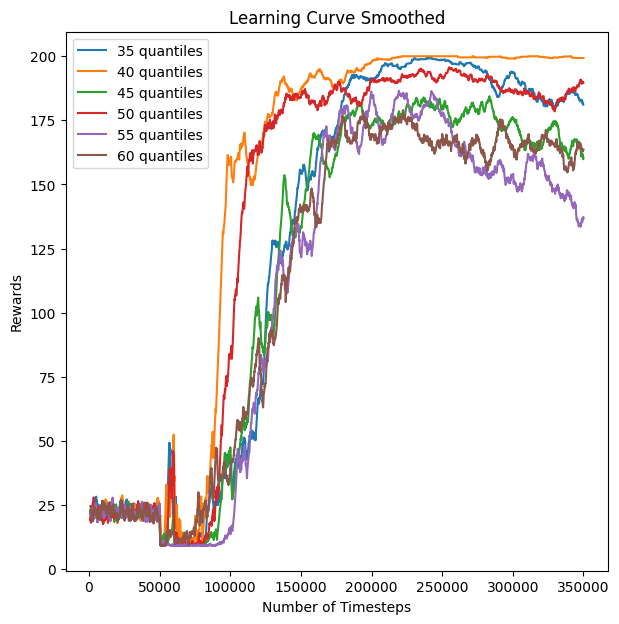

In [ ]:
plot_results(log_folders)